In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import os
wd = os.getcwd()
wd

'C:\\Users\\Nils\\Documents\\KIT-TVWL\\Master\\SS 18\\KD Seminar\\Git\\mlp'

**Read in financial Data**

In [3]:
fin_data = pd.read_csv("../finance_data/data/aggregated_returns.csv", index_col=["Timestamp"], parse_dates=True)
fin_data = fin_data.drop(columns=["Unnamed: 0"])
fin_data.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2018-06-26,-0.020011,0.022931,-0.006720,0.018864,0.001459,-0.005366,-0.026297,-0.004166,-0.016150,-0.002037,-0.009024
2018-06-25,-0.007475,0.019951,-0.001396,0.008597,0.002809,-0.026638,0.005686,-0.012330,0.008662,0.005086,-0.013286
2018-06-22,0.012780,-0.011590,0.022561,0.021117,0.026346,0.001860,0.035248,0.014983,0.029023,0.018347,0.038439
2018-06-21,-0.004242,-0.005008,-0.012830,0.002637,-0.025100,0.040761,-0.016659,0.002916,-0.001797,0.011267,0.026642
2018-06-20,-0.001063,0.024795,0.013967,0.012291,0.005277,0.041458,0.010569,0.005592,0.020061,0.029838,0.003916


In [4]:
fin_data_class = fin_data.applymap(lambda x: 0 if x < 0 else 1)

In [5]:
fin_data_class.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2018-06-26,0,1,0,1,1,0,0,0,0,0,0
2018-06-25,0,1,0,1,1,0,1,0,1,1,0
2018-06-22,1,0,1,1,1,1,1,1,1,1,1
2018-06-21,0,0,0,1,0,1,0,1,0,1,1
2018-06-20,0,1,1,1,1,1,1,1,1,1,1


In [6]:
val_count = {0: 0, 1: 0}
for idx, row in fin_data_class.iterrows():
    tmp = row.value_counts()
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 10524,
 1: 10266,
 '0_relative': 50.619999999999997,
 '1_relative': 49.380000000000003}

**Read in training Data**

In [9]:
path_to_data = "../doc2vec/data/article_vectors_2016-05-09-2018-06-18.json"

In [10]:
data = pd.read_json(path_to_data)

In [11]:
data = data.applymap(lambda x: np.array(x))

In [12]:
data.head(2)

,Samsung,BASF,Apple,Tesla,Airbus,Bayer,BMW,Telefonica,Google,Allianz,Total
2016-05-09,"[[-0.2783023417, 1.64141333103, -0.20274081826...","[[0.224157735705, -1.5261811018, -1.2688174247...","[[-0.722135663033, -1.72117328644, -1.80950939...","[[0.423787772655, -0.74573212862, 0.9875811934...","[[0.148221626878, 1.14429688454, 0.40630602836...","[[-1.70463657379, -1.86712861061, 0.5173683166...","[[0.114925034344, 2.18565130234, 0.77067273855...","[[5.12693452835, 0.508681952953, -1.3149539232...","[[0.143301770091, -2.48351478577, 0.5807461142...","[[1.78534734249, -0.00683000870049, -0.1249627...","[[-4.92617940903, -2.99923372269, -3.530821084..."
2016-05-10,"[[-0.674747109413, 1.27446496487, 0.4876792728...","[[-1.70561218262, -1.01267302036, -0.294923424...","[[-1.54350924492, -4.86762571335, 2.2554593086...","[[-2.1006333828, 1.75756955147, -0.47064906358...","[[-1.10437369347, -1.62711632252, -0.592201709...","[[0.421989887953, -0.531891644001, -1.12830972...","[[0.134391367435, 0.00158115802333, 1.10614168...","[[1.03278207779, 3.52327179909, 1.57724928856,...","[[-2.00603866577, -1.06945300102, -1.689569711...","[[-0.55547773838, -0.371566027403, 3.171932458...","[[-0.825915932655, -1.2935500145, -1.318230867..."


In [13]:
fin_data_dates = fin_data.index.date.tolist()
data_dates = data.index.date.tolist()

In [14]:
available_dates = list(set(fin_data_dates).intersection(data_dates))

fin_data_class = fin_data_class[fin_data_class.index.isin(available_dates)]
data = data[data.index.isin(available_dates)]

In [15]:
val_count = {0: 0, 1: 0}
for idx, row in fin_data_class.iterrows():
    tmp = row.value_counts()
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 2796,
 1: 2649,
 '0_relative': 51.350000000000001,
 '1_relative': 48.649999999999999}

In [16]:
len(available_dates)

495

In [17]:
data.shape

(495, 11)

In [18]:
X = []

In [19]:
for idx, row in data.iterrows():
    print(idx.date())
    tmp = data.loc[idx].values

    tmp_data = []
    for i,r in enumerate(tmp):
        #print(type(r))
        #print(type(r))
        if hasattr(r, 'shape') and r.shape[0] :
            #print(type(r))
            #print("HEY")
            r = np.array(r)
            #if r.shape[0] != 50:
            #    print(r.shape)
            p = 50-r.shape[0]
            r = np.pad(r, ((0,p),(0,0)), "constant")
            #print(r)
        else:
            r = np.zeros((50,100))
        tmp_data.append(r)
    tmp_data = np.array(tmp_data)
    tmp_data = tmp_data.reshape((50,100,11))
    #print(tmp_data)
    X.append(tmp_data)
    #data_dict[idx.date()] = tmp
    

2016-05-09
2016-05-10
2016-05-11
2016-05-12
2016-05-13
2016-05-17
2016-05-18
2016-05-19
2016-05-20
2016-05-23
2016-05-24
2016-05-25
2016-05-26
2016-05-27
2016-05-31
2016-06-01
2016-06-02
2016-06-03
2016-06-07
2016-06-08
2016-06-09
2016-06-10
2016-06-13
2016-06-14
2016-06-15
2016-06-16
2016-06-17
2016-06-20
2016-06-21
2016-06-22
2016-06-23
2016-06-24
2016-06-27
2016-06-28
2016-06-29
2016-06-30
2016-07-01
2016-07-05
2016-07-06
2016-07-07
2016-07-08
2016-07-11
2016-07-12
2016-07-13
2016-07-14
2016-07-15
2016-07-18
2016-07-19
2016-07-20
2016-07-21
2016-07-22
2016-07-25
2016-07-26
2016-07-27
2016-07-28
2016-07-29
2016-08-01
2016-08-02
2016-08-03
2016-08-04
2016-08-05
2016-08-08
2016-08-09
2016-08-10
2016-08-11
2016-08-12
2016-08-16
2016-08-17
2016-08-18
2016-08-19
2016-08-22
2016-08-23
2016-08-24
2016-08-25
2016-08-26
2016-08-29
2016-08-30
2016-08-31
2016-09-01
2016-09-02
2016-09-06
2016-09-07
2016-09-08
2016-09-09
2016-09-12
2016-09-13
2016-09-19
2016-09-20
2016-09-21
2016-09-22
2016-09-23

In [20]:
#X = np.array(final_d)
X = np.array(X)
X.shape

(495, 50, 100, 11)

In [21]:
X[30][0][0]

array([ 0.42814672, -0.83220714, -0.49539551, -0.71838945,  0.15086618,
        0.70842946,  1.3875035 ,  0.1596328 ,  0.17833374, -0.29385453,
       -1.04801702])

In [22]:
Y = fin_data_class.values
Y.shape

(495, 11)

**CNN**

In [23]:
from sklearn.model_selection import train_test_split

from keras import backend as K
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, GaussianNoise
from keras.layers import Conv1D, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D

from keras import regularizers

Using TensorFlow backend.


In [82]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.4, random_state=21)

In [83]:
x_train.shape

(297, 50, 100, 11)

In [84]:
num_classes=11
num_filters= 100
filter_sizes = [3,4,5]
embedding_dim = x_train.shape[2]
sequence_length = x_train.shape[1] 

In [85]:
sequence_length

50

In [86]:
def custom_tanh(x):
    return (K.tanh((2/3)*x) * 1.5)#1.7159) #(2/3)

def custom_sigmoid(x):
    return (K.sigmoid((3/4) * x) )#* 1.7159)

In [101]:
model = Sequential()
model.add(GaussianNoise(stddev=3,input_shape=x_train.shape[1:]))
model.add(Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid',input_shape=x_train.shape[1:], 
                 data_format="channels_last", activation="relu")) #relu
#, kernel_regularizer=regularizers.l2(0.01)
#model.add(Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='same', activation="relu"))

model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1))) #data_format="channels_last"
model.add(AveragePooling2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))) 
model.add(BatchNormalization())
#model.add(Conv2D(num_filters, kernel_size=(1,embedding_dim), strides=(1,1), activation="relu"))
#model.add(MaxPooling2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
#model.add(GaussianNoise(stddev=3))
#model.add(Conv2D(64, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation="relu")) #custom_tanh
#model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(num_classes, activation=custom_sigmoid)) #"sigmoid"  custom_sigmoid 

In [102]:
#### initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
adam_opt = keras.optimizers.adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)
# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy', #binary_crossentropy
              optimizer=adam_opt,#opt,"Adam"
              metrics=['binary_accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_17 (GaussianN (None, 50, 100, 11)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 48, 1, 100)        330100    
_________________________________________________________________
batch_normalization_31 (Batc (None, 48, 1, 100)        400       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 1, 1, 100)         0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 1, 1, 100)         400       
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 1, 100)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 100)               0         
__________

In [103]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=100, batch_size=10, verbose=2)

Train on 297 samples, validate on 198 samples
Epoch 1/100
 - 5s - loss: 0.7125 - binary_accuracy: 0.4943 - val_loss: 0.6963 - val_binary_accuracy: 0.5152
Epoch 2/100
 - 3s - loss: 0.6927 - binary_accuracy: 0.5338 - val_loss: 0.6964 - val_binary_accuracy: 0.4977
Epoch 3/100
 - 3s - loss: 0.6908 - binary_accuracy: 0.5516 - val_loss: 0.7007 - val_binary_accuracy: 0.5087
Epoch 4/100
 - 3s - loss: 0.6869 - binary_accuracy: 0.5510 - val_loss: 0.6964 - val_binary_accuracy: 0.5110
Epoch 5/100
 - 3s - loss: 0.6854 - binary_accuracy: 0.5531 - val_loss: 0.6955 - val_binary_accuracy: 0.5129
Epoch 6/100
 - 3s - loss: 0.6838 - binary_accuracy: 0.5470 - val_loss: 0.6955 - val_binary_accuracy: 0.5032
Epoch 7/100
 - 3s - loss: 0.6773 - binary_accuracy: 0.5742 - val_loss: 0.6940 - val_binary_accuracy: 0.5156
Epoch 8/100
 - 3s - loss: 0.6787 - binary_accuracy: 0.5865 - val_loss: 0.7036 - val_binary_accuracy: 0.4922
Epoch 9/100
 - 3s - loss: 0.6657 - binary_accuracy: 0.5914 - val_loss: 0.7009 - val_binary

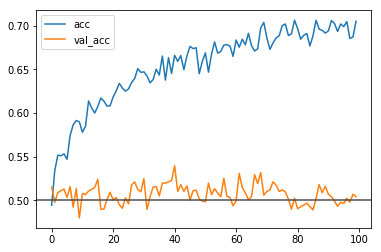

In [104]:
plt.plot(history.history["binary_accuracy"], label="acc")
plt.plot(history.history["val_binary_accuracy"], label="val_acc")
plt.axhline(0.5, c=".3")
plt.legend()
plt.show()

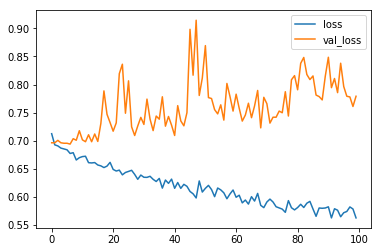

In [105]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [106]:
preds = model.predict(X)


In [107]:
df_predictions = pd.DataFrame(preds, columns=fin_data_class.columns, index = fin_data_class.index)#[1 if t > 0.5 else 0 for t in Y[1]]
df_predictions.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2018-06-18,0.335103,0.752789,0.548571,0.808693,0.791413,0.777210,0.816072,0.260249,0.702109,0.507300,0.143797
2018-06-15,0.742311,0.570370,0.856073,0.258788,0.769554,0.558493,0.778521,0.329652,0.710911,0.810072,0.464994
2018-06-14,0.837552,0.505016,0.934739,0.496353,0.784647,0.386688,0.875893,0.464100,0.914855,0.849305,0.429577
2018-06-12,0.710447,0.290176,0.732680,0.566733,0.469262,0.532172,0.587147,0.503354,0.722274,0.477530,0.476929
2018-06-11,0.779927,0.447775,0.643953,0.408998,0.550599,0.462532,0.559283,0.207809,0.672667,0.588936,0.429674


In [108]:
def try_cuts(df, cut_count):
    cuts = np.linspace(0,1,cut_count)
    accs = []
    for c in cuts:
        df_tmp = df.applymap(lambda x: 1 if x > c else 0)
        df_tmp = fin_data_class.rsub(df_tmp)
        df_tmp["error_sum"] = df_tmp.apply(lambda x: np.sum(abs(x)), axis=1)
        
        total_returns = df_tmp.shape[0] * df_tmp.shape[1]
        error_sum = df_tmp["error_sum"].sum()
        accuracy = (total_returns - error_sum) / total_returns
        
        accs.append(accuracy)
    return accs, cuts

In [109]:
accs, cuts = try_cuts(df_predictions, 30)

Text(0,0.5,'Accuracy')

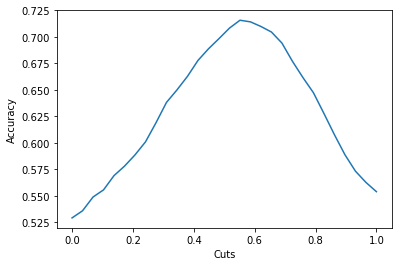

In [110]:
plt.plot(cuts, accs)
plt.xlabel("Cuts")
plt.ylabel("Accuracy")

In [44]:
df_predictions = df_predictions.applymap(lambda x: 1 if x > 0.5 else 0)
df_predictions.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2017-08-02,0,0,0,0,0,0,0,0,0,0,0
2017-08-01,0,0,1,0,0,0,1,0,0,0,0
2017-07-31,0,0,1,0,0,0,1,0,0,0,0
2017-07-28,0,0,0,0,0,0,0,0,0,0,0
2017-07-27,0,0,0,0,0,0,0,0,0,0,0


In [45]:
fin_data_class.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2018-06-18,0,1,1,1,1,1,1,1,1,1,0
2018-06-15,1,0,1,0,1,0,1,1,1,1,1
2018-06-14,1,0,1,1,1,0,1,1,1,1,0
2018-06-12,1,0,1,1,0,0,1,1,1,1,0
2018-06-11,1,0,0,0,1,0,1,0,1,1,1


In [202]:
df_pred_errors = fin_data_class.rsub(df_predictions)

In [203]:
def count_fp(x):
    company_list = fin_data_class.columns
    tmp = x[company_list]
    
    if 1 in tmp.value_counts():
        return tmp.value_counts()[1]
    else:
        return 0
    
def count_fn(x):
    company_list = fin_data_class.columns
    tmp = x[company_list]
    
    if -1 in tmp.value_counts():
        return tmp.value_counts()[-1]
    else:
        return 0

In [204]:
df_pred_errors["error_sum"] = df_pred_errors.apply(lambda x: np.sum(abs(x)), axis=1)
#df_pred_errors["fale_pos_sum"] = df_pred_errors.apply(count_fp, axis=1)
#df_pred_errors["fale_neg_sum"] = df_pred_errors.apply(count_fn, axis=1)

In [187]:
df_pred_errors["fale_pos_sum"].sum()

732

In [188]:
df_pred_errors["fale_neg_sum"].sum()

330

In [189]:
df_pred_errors.iloc[:200].shape[0] * df_pred_errors.iloc[:200].shape[1]

2800

In [190]:
df_pred_errors.iloc[:200].error_sum.sum()

190

In [205]:
total_returns = df_pred_errors.shape[0] * df_pred_errors.shape[1]

In [206]:
error_sum = df_pred_errors["error_sum"].sum()

In [207]:
accur = (total_returns - error_sum) / total_returns
accur

0.74714285714285711

In [170]:
preds.shape

(350, 11)

In [171]:
Y.shape

(350, 11)

In [83]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [100]:
precision, recall, thresholds = precision_recall_curve(Y.ravel(), preds.ravel())

Text(0,0.5,'Precision')

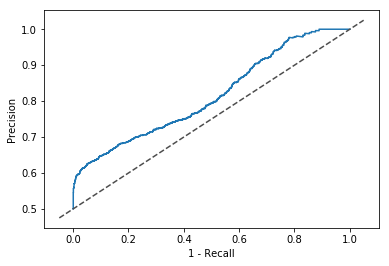

In [101]:
plt.plot((1 - recall), precision)
#plt.step((1-recall), thresholds.add(1))
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel("1 - Recall")
plt.ylabel("Precision")

In [102]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y.ravel(), preds.ravel())

In [103]:
auc_keras = auc(fpr_keras, tpr_keras)

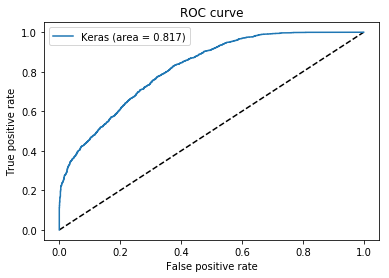

In [104]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [25]:
from keras.layers import Dense, Input, Flatten, Reshape, concatenate, Dropout
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model
from keras import optimizers
from keras import regularizers

In [54]:
x_train[0][0][0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [51]:
inputs = Input(shape=(sequence_length,))#, dtype='int32'

reshape = Reshape((sequence_length,embedding_dim,11))(x_train)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)

maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
output = Dense(units=2, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
print("Traning Model...")
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[checkpoint], validation_data=(X_test, y_test)) # starts training

ValueError: Layer reshape_2 was called with an input that isn't a symbolic tensor. Received type: <class 'numpy.ndarray'>. Full input: [array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       ..., 
       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]]])]. All inputs to the layer should be tensors.

In [44]:
model.compile(loss='binary_crossentropy',
              optimizer="Adam",#opt,
              metrics=['binary_accuracy'])

In [45]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=20, batch_size=25, verbose=2)

Train on 103 samples, validate on 45 samples
Epoch 1/20
 - 3s - loss: 0.6931 - binary_accuracy: 0.4987 - val_loss: 0.6931 - val_binary_accuracy: 0.5131
Epoch 2/20
 - 2s - loss: 0.6930 - binary_accuracy: 0.5446 - val_loss: 0.6930 - val_binary_accuracy: 0.5131
Epoch 3/20
 - 2s - loss: 0.6930 - binary_accuracy: 0.5428 - val_loss: 0.6930 - val_binary_accuracy: 0.5232
Epoch 4/20
 - 2s - loss: 0.6930 - binary_accuracy: 0.5437 - val_loss: 0.6930 - val_binary_accuracy: 0.5232
Epoch 5/20
 - 3s - loss: 0.6929 - binary_accuracy: 0.5437 - val_loss: 0.6929 - val_binary_accuracy: 0.5232
Epoch 6/20
 - 2s - loss: 0.6929 - binary_accuracy: 0.5437 - val_loss: 0.6929 - val_binary_accuracy: 0.5232
Epoch 7/20
 - 2s - loss: 0.6928 - binary_accuracy: 0.5437 - val_loss: 0.6929 - val_binary_accuracy: 0.5232
Epoch 8/20
 - 3s - loss: 0.6928 - binary_accuracy: 0.5437 - val_loss: 0.6928 - val_binary_accuracy: 0.5232
Epoch 9/20
 - 3s - loss: 0.6927 - binary_accuracy: 0.5437 - val_loss: 0.6928 - val_binary_accuracy:

In [49]:
history["val_binary_accuracy"].plot()

TypeError: 'History' object is not subscriptable